In [1]:
import os
import yaml
import argparse
import numpy as np
from pathlib import Path
from models import *
from experiment import VAEXperiment
import torch.backends.cudnn as cudnn
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.utilities.seed import seed_everything
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint
from dataset import VAEDataset
from pytorch_lightning.plugins import DDPPlugin

import matplotlib.pyplot as plt

In [29]:
model_nm="VanillaVAE"
args_filename="configs/vae.yaml"
with open(args_filename, 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

In [3]:
model = vae_models[config['model_params']['name']](**config['model_params'])


In [4]:
# model

In [5]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
chk_path="logs/"+model_nm+"/version_2/checkpoints/last.ckpt"

checkpoint = torch.load(chk_path,map_location=torch.device(device))


In [6]:
checkpoint.keys()

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'callbacks', 'optimizer_states', 'lr_schedulers'])

In [7]:
# checkpoint['state_dict']

In [8]:
for nm,params in model.named_parameters():
    print(nm)
    print("model."+nm in checkpoint["state_dict"])
    keyy="model."+nm 
    params.data=checkpoint["state_dict"][keyy]

encoder.0.0.weight
True
encoder.0.0.bias
True
encoder.0.1.weight
True
encoder.0.1.bias
True
encoder.1.0.weight
True
encoder.1.0.bias
True
encoder.1.1.weight
True
encoder.1.1.bias
True
encoder.2.0.weight
True
encoder.2.0.bias
True
encoder.2.1.weight
True
encoder.2.1.bias
True
encoder.3.0.weight
True
encoder.3.0.bias
True
encoder.3.1.weight
True
encoder.3.1.bias
True
encoder.4.0.weight
True
encoder.4.0.bias
True
encoder.4.1.weight
True
encoder.4.1.bias
True
fc_mu.weight
True
fc_mu.bias
True
fc_var.weight
True
fc_var.bias
True
decoder_input.weight
True
decoder_input.bias
True
decoder.0.0.weight
True
decoder.0.0.bias
True
decoder.0.1.weight
True
decoder.0.1.bias
True
decoder.1.0.weight
True
decoder.1.0.bias
True
decoder.1.1.weight
True
decoder.1.1.bias
True
decoder.2.0.weight
True
decoder.2.0.bias
True
decoder.2.1.weight
True
decoder.2.1.bias
True
decoder.3.0.weight
True
decoder.3.0.bias
True
decoder.3.1.weight
True
decoder.3.1.bias
True
final_layer.0.weight
True
final_layer.0.bias
True
fi

In [9]:
checkpoint['state_dict']["model.encoder.0.0.weight"][0][0]


tensor([[-0.5715, -0.0543,  0.4236],
        [-0.5510,  0.1163,  0.4988],
        [-0.7205,  0.1809,  0.2350]])

In [10]:
for nm,params in model.named_parameters():
    print(params.data[0][0])
    break

tensor([[-0.5715, -0.0543,  0.4236],
        [-0.5510,  0.1163,  0.4988],
        [-0.7205,  0.1809,  0.2350]])


In [11]:
data = VAEDataset(**config["data_params"])
data.setup()
tloader=data.test_dataloader()

X_vals=[]
with torch.no_grad():
    for nxt in tloader:
        print(len(nxt),nxt[0].shape,nxt[1].shape)
        enc=model.encode(nxt[0])
        print(len(enc),enc[0].shape,enc[1].shape)
        enc_batch=torch.cat(enc,1)
        enc_batch=enc_batch.detach().numpy()
        X_vals.append(enc_batch)

In [62]:
# X_vals

In [26]:
X_vals_arr=np.concatenate(X_vals)

if not os.path.isdir("logs/"+model_nm+"/enc"):
    os.mkdir("logs/"+model_nm+"/enc")
    
np.save("logs/"+model_nm+"/enc/test_enc.npy",X_vals_arr)

In [28]:
# X_vals_arr.shape

(19962, 256)

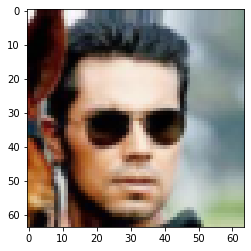

In [48]:
plt.imshow(nxt[0][9].permute(1,2,0))

In [ ]:
tloader.batch_size

In [ ]:
# data.prepare_data()

In [ ]:
# data.has_prepared_data



In [63]:
nxt[1].shape

torch.Size([144, 40])